<a href="https://colab.research.google.com/github/naharluna/Emotion-Detection-Using-CNN/blob/main/Emotion_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install opencv-python

In [ ]:
!pip install keras

In [ ]:
!pip3 install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 995.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 show tensorflow


Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!pip3 install --upgrade tf-keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [ ]:
!pip install tensorflow

In [ ]:
!pip3 install --upgrade tensorflow

In [ ]:
!pip install pillow

In [ ]:
from google.colab import drive

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install tensorflow-gpu keras --upgrade



In [ ]:
!pip install tensorflow-gpu --index-url=https://pypi.org/simple
!pip install --upgrade pip
!pip install /path/to/tensorflow_gpu_package.whl



2.15.0
Loaded model from disk
Found 7178 images belonging to 7 classes.
113/113 [==============================] - 2062s 18s/step
-----------------------------------------------------------------
[[ 444    6  116   69  104  192   27]
 [  18   67    6    3    4   11    2]
 [  84    4  464   63  127  198   84]
 [  37    0   40 1487   98   83   29]
 [  77    3   89  122  711  214   17]
 [ 107    6  146  105  201  652   30]
 [  20    0   54   43   37   31  646]]


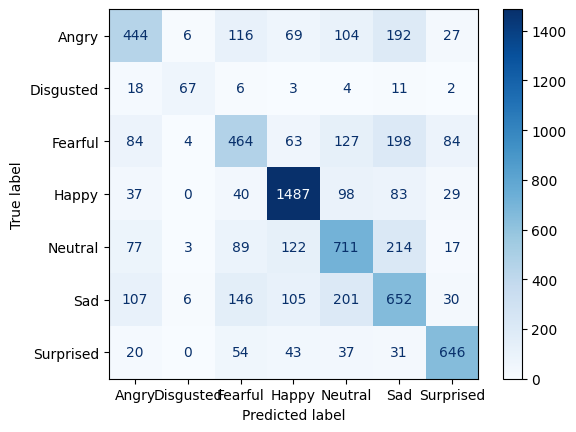

-----------------------------------------------------------------
              precision    recall  f1-score   support

       Angry       0.56      0.46      0.51       958
   Disgusted       0.78      0.60      0.68       111
     Fearful       0.51      0.45      0.48      1024
       Happy       0.79      0.84      0.81      1774
     Neutral       0.55      0.58      0.57      1233
         Sad       0.47      0.52      0.50      1247
   Surprised       0.77      0.78      0.78       831

    accuracy                           0.62      7178
   macro avg       0.63      0.61      0.62      7178
weighted avg       0.62      0.62      0.62      7178



In [ ]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
from keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load json and create model
with open('/content/drive/MyDrive/FER2013 dataset/files/model/emotion_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
emotion_model = model_from_json(loaded_model_json)

# Load weights into the new model
emotion_model.load_weights("/content/drive/MyDrive/FER2013 dataset/files/model/emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
    '/content/drive/MyDrive/FER2013 dataset/Dataset/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False)  # Ensure the data is not shuffled

# Do prediction on test data
predictions = emotion_model.predict(test_generator)

print("-----------------------------------------------------------------")
# Confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=list(emotion_dict.values()))
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1), target_names=list(emotion_dict.values())))


In [ ]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
       '/content/drive/MyDrive/FER2013 dataset/Dataset/test',
       target_size=(48, 48),
       batch_size=64,
       color_mode="grayscale",
       class_mode='categorical')

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
       '/content/drive/MyDrive/FER2013 dataset/Dataset/train',
       target_size=(48, 48),
       batch_size=64,
       color_mode="grayscale",
       class_mode='categorical')

# Create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))


emotion_model.add(Dropout(0.25))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

# Updated optimizer initialization
emotion_model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learning_rate=0.0001),
                      metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit(
       train_generator,
       steps_per_epoch=train_generator.samples // train_generator.batch_size,
       epochs=22,
       validation_data=validation_generator,
       validation_steps=validation_generator.samples // validation_generator.batch_size)

# Save model structure in JSON file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# Save trained model weights in .h5 file
emotion_model.save_weights('emotion_model.h5')

Found 7614 images belonging to 7 classes.
Found 22270 images belonging to 7 classes.
Epoch 1/22
118/118 [==============================] - ETA: 0s - loss: 1.9269 - accuracy: 0.2176 

Loaded model from disk
1/1 [==============================] - 0s 146ms/step


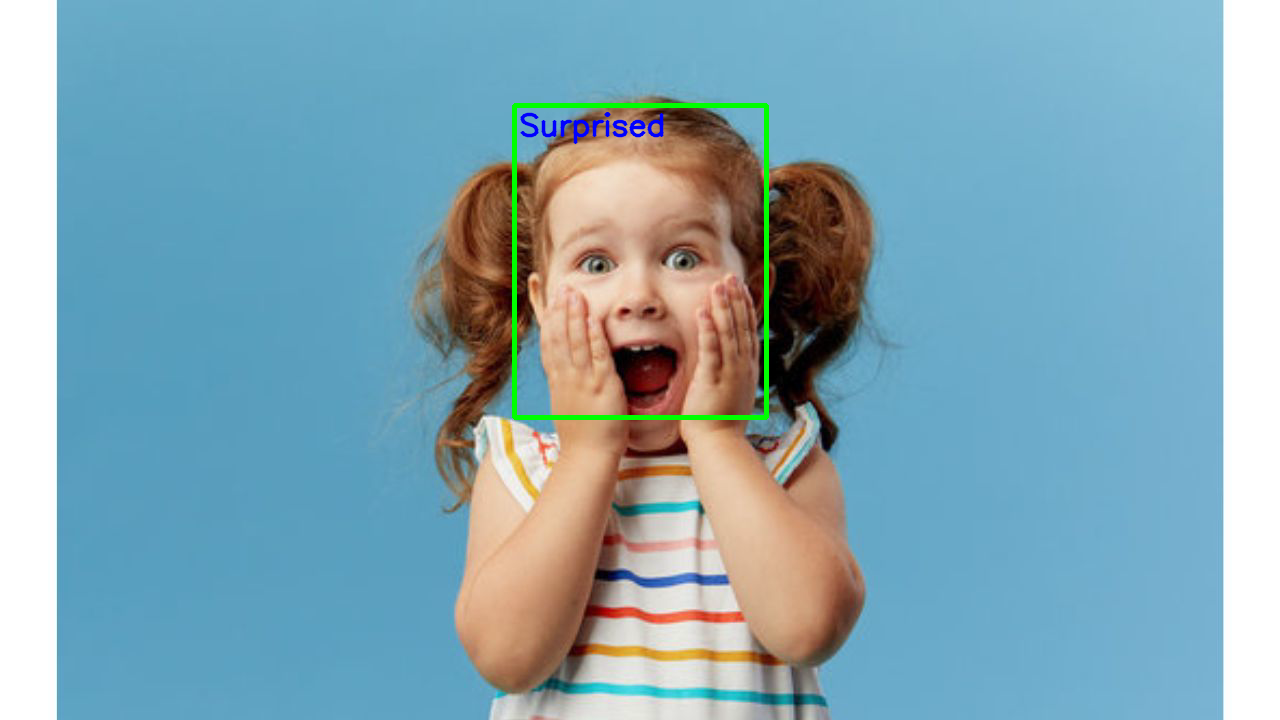

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json
from google.colab.patches import cv2_imshow

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

#load json and create model
json_file= open('/content/drive/MyDrive/FER2013 dataset/files/model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("/content/drive/MyDrive/FER2013 dataset/files/model/emotion_model.h5")
print("Loaded model from disk")

#cap = cv2.VideoCapture("/content/drive/MyDrive/FER2013 dataset/files/Happy.mp4")
#cap = cv2.VideoCapture("/content/drive/MyDrive/FER2013 dataset/files/anger-topic-page-tile_tcm7-308367_w1024_n.jpg")
#cap = cv2.VideoCapture("/content/drive/MyDrive/FER2013 dataset/files/baccha kande.jpg")
cap = cv2.VideoCapture("/content/drive/MyDrive/FER2013 dataset/files/obak baccha.jpg")
#cap = cv2.VideoCapture("/content/drive/MyDrive/FER2013 dataset/files/dscfd.jpg")

#while True:
    # Find haar cascade to draw bounding box around face
    #ret, frame = cap.read()
    #frame = cv2.resize(frame, (1280, 720))
    #if not ret:
     #   break
    #face_detector = cv2.CascadeClassifier('/content/Emotion/haarcascade_frontalface_default.xml')
    #gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()

    if not ret:
        break

    frame = cv2.resize(frame, (1280, 720))
    if frame is None or frame.size == 0:
        # Skip processing if the frame is empty or has invalid dimensions
        continue

    face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/FER2013 dataset/files/haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Your face detection and further processing code goes here
    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
